In [3]:
import json
# from tqdm import tqdm
from utils import *

INFO:utils:fetching results


INFO:utils:NLP pipeline
3it [00:01,  2.49it/s]
/data/ws/MedicalResearchTextAnalyser/.venv/lib64/python3.11/site-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


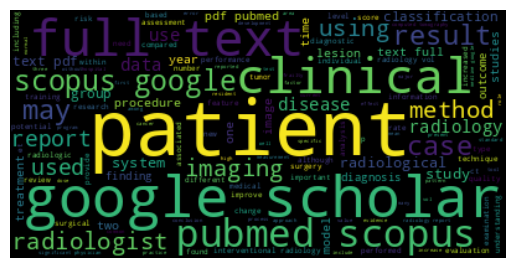

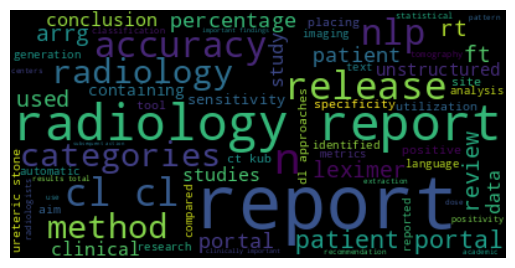

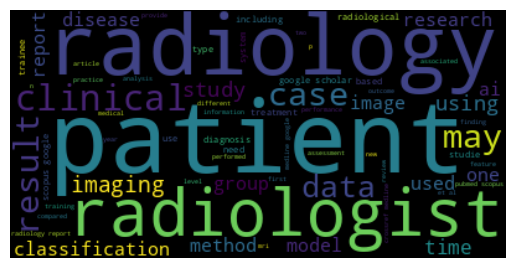

In [4]:
logger.info("fetching results")
# d1 = query_openalex(n=500)
# d2 = query_scopus(review_only=True)
# d3 = query_openalex(n=500, since_year=2019)

# for i, d in tqdm(enumerate([d1, d2, d3])):
#     with open(f"data/d{i+1}.json", "w", encoding="utf8") as f:
#         f.write(json.dumps(d))

data = []

for i in range(3):
    with open(f"data/d{i+1}.json", encoding="utf8") as f:
        data.append(json.loads(f.read()))

logger.info("NLP pipeline")
d_processed = []
for i, d_raw in tqdm(enumerate(data)):
    nlp_out = run_nlp_pipeline([w["abstract"] for w in d_raw["results"]])
    d_processed.append(nlp_out)
    # print(nlp_out[0][0], nlp_out[0][1], nlp_out[0][2])

for i, d_proc in enumerate(d_processed):
    wordcloud = WordCloud().generate(d_proc[3])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
